In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [4]:
img_w = 1280
img_h =  720
n_w   =    9 # number of corners in w (x)
n_h   =    6 # numbe

In [47]:
def read_img(fname):
    return cv2.cvtColor(
        cv2.imread(fname),
        cv2.COLOR_BGR2RGB
    )

def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [48]:
def find_corners(img):
    return cv2.findChessboardCorners(
        grayscale(img), (n_w, n_h), None
    )

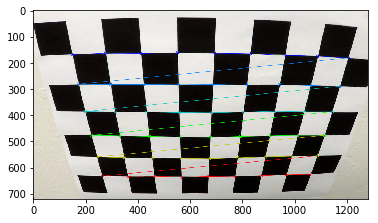

In [61]:
cal2 = read_img('camera_cal/calibration2.jpg')
success, corners = find_corners(cal2)
if success:
    cal2_copy = cal2.copy() # drawChessboardCorners modify its parameter
    cv2.drawChessboardCorners(cal2_copy, (n_w, n_h), corners, True)
    plt.imshow(cal2_copy)

In [51]:
# Arrays to store object points and image points from all the images
objpoints = [] # 3D points in real world space
imgpoints = [] # 2D points in image plane

objp = np.zeros((n_h * n_w, 3), np.float32)
objp[:,:2] = np.mgrid[0:n_w, 0:n_h].T.reshape(-1, 2) # x, y coordinate

for i in range(1, 21):
    img = read_img('camera_cal/calibration{}.jpg'.format(i))
    success, corners = find_corners(img)
    
    if success == True:
        imgpoints.append(corners)
        objpoints.append(objp)

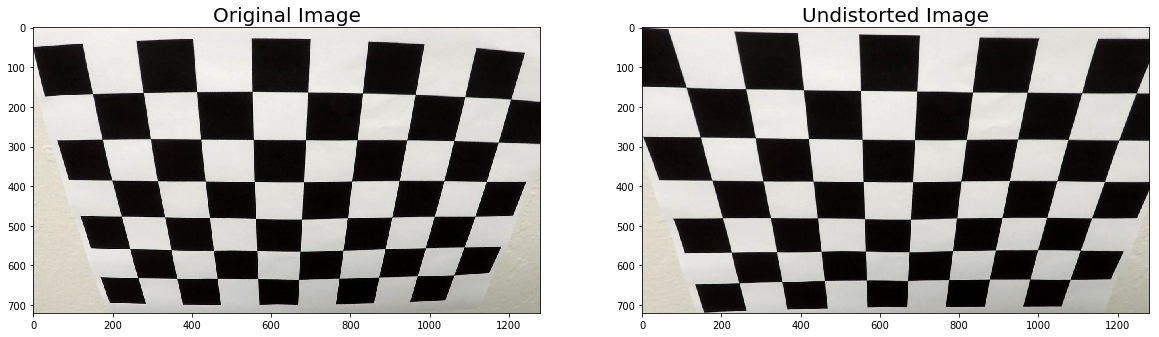

In [63]:
#test1 = cv2.cvtColor(
#    cv2.imread('test_images/test1.jpg'),
#    cv2.COLOR_BGR2RGB
#)
cal2_und = undistort(cal2)

# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(cal2)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(cal2_und)
ax2.set_title('Undistorted Image', fontsize=20)


# plt.imshow(test1)

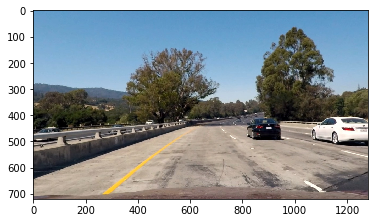

In [40]:

plt.imshow(test1_und)

In [ ]:
nx = 8#TODO: enter the number of inside corners in x
ny = 6#TODO: enter the number of inside corners in y

# Make a list of calibration images
fname = 'test_images/test1.jpg'
img = cv2.cvtColor(cv2.imread(fname), cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

In [ ]:
def crop(img):
    return img[400:-40, 160:-160]

In [ ]:
cropped = crop(img)
plt.imshow(cropped)
plt.show()